<h1><center>Taller 16 de mayo, 2023: Sumativo SHAP</center></h1>
<h2><center>IMT2240: Ciencia de Datos Responsable</center></h2>

## Instrucciones generales.

**Fecha de Entrega** : 19 de mayo, 23:59 hrs, a través de Canvas.

El presente taller es INDIVIDUAL y debe seguir todos los lineamientos de Integridad Académica. Recuerde que cualquier código externo debe ser correctamente referenciado, en caso contrario será considerado plagio.

## Introducción.

La problemática del cáncer de mama es una cuestión de salud pública que afecta a millones de mujeres en todo el mundo. Esta enfermedad se caracteriza por el crecimiento anormal y descontrolado de células malignas en los tejidos mamarios. Aunque se han logrado avances significativos en la detección y tratamiento del cáncer de mama, sigue siendo una de las principales causas de muerte entre las mujeres. La falta de conciencia y educación sobre los factores de riesgo, la dificultad en acceder a servicios de detección temprana y la falta de recursos para el tratamiento son algunos de los desafíos que enfrentan los pacientes y los sistemas de salud en la lucha contra esta enfermedad.

## Evaluación.

Para la resolución del siguiente taller, se tienen datos sobre diagnósticos de tumores malignos y benignos, en base a los cuales se le solicita lo siguiente:

1. Realice el procedimiento necesario para entrenar un RandomForestClassifier con los datos entregados. No olvide realizar pre-procesamiento, análisis exploratorio, etc. Evalúe su modelo y explique sus resultados. **(3 ptos.)**<br></br>



In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv('cancer.csv')
data.drop(columns='id', inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [95]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

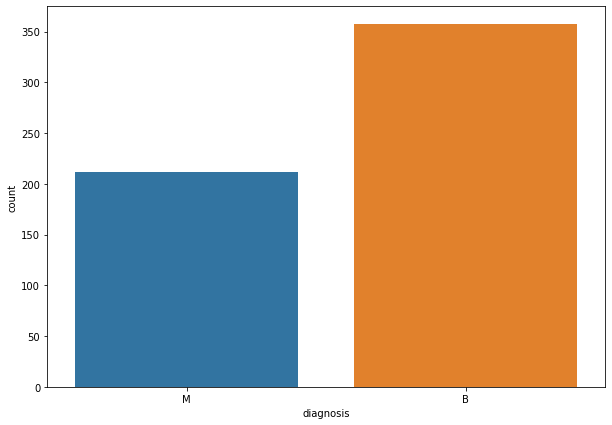

In [96]:
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=data, x = 'diagnosis', ax=ax)

In [97]:
data_num = data.select_dtypes(include=[int, float]).columns
data_cat = data.select_dtypes(exclude=[int, float]).columns

In [98]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
cat_cod = encoder.fit_transform(data[['diagnosis']])
new_columns = pd.DataFrame(cat_cod.toarray(), columns=['B', 'M'])
new_columns

,B,M
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
564,0.0,1.0
565,0.0,1.0
566,0.0,1.0
567,0.0,1.0


In [99]:
data = pd.concat([new_columns['M'], data], axis=1)
data.drop(columns=['diagnosis'], inplace=True)
data.rename({'M':'is_maligno'}, axis=1, inplace=True)
data

,is_maligno,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data[data_num])
data_std = pd.DataFrame(data_std, columns=data_num)
data[data_num] = data_std
data

,is_maligno,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.0,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1.0,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.0,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [102]:
data_bool = data['is_maligno']
data_model = data.drop(['is_maligno'], axis=1)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(data_model, data_bool, test_size=0.3)

forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)

In [104]:
forest_model.score(x_test, y_test)

0.9473684210526315

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       109
         1.0       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



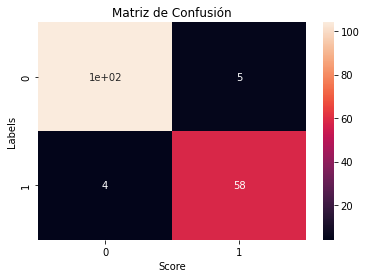

In [105]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)
plt.ylabel('Labels')
plt.xlabel('Score')
plt.title('Matriz de Confusión')

report= classification_report(y_test, y_pred)
print(report)

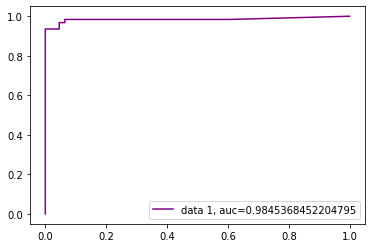

In [106]:
l_proba = forest_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, l_proba)
auc = roc_auc_score(y_test, l_proba)
plt.plot(fpr, tpr, color='purple' ,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

2. Usando SHAP, analice la interpretabilidad local de 6 registros de sus datos de testeo cuya predicción sea maligna. Realice un pequeño analisis individual para cada registro y luego un análisis general. Incluya force plots y dependence plots. **(3 pts.)**

In [107]:
to_explain = x_test.join(y_test).join(pd.DataFrame(y_pred, columns=['pred'], index=x_test.index)).reset_index(drop=True)
to_explain

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,is_maligno,pred
0,-0.678025,-1.226283,-0.730262,-0.647287,-1.297366,-1.154922,-0.833014,-0.549132,1.056515,-0.236401,...,-0.672005,-0.609790,-1.261097,-1.076762,-0.982717,-0.482778,0.323951,-0.945716,0.0,0.0
1,-0.916597,-1.472952,-0.958868,-0.819355,-1.509439,-1.272800,-1.076078,-1.091889,-1.349457,-0.760915,...,-0.869485,-0.721769,-0.669312,-1.089867,-1.216885,-1.143155,-0.263303,-0.393221,0.0,0.0
2,1.613970,0.665623,1.566503,1.720997,0.138753,-0.031099,0.742007,1.188093,-0.838325,-1.254241,...,2.369129,2.667486,0.825491,0.386359,1.271399,1.891049,-0.214770,-0.432012,1.0,1.0
3,-0.198041,0.079202,-0.252456,-0.254516,-0.418473,-0.785747,-0.379403,-0.375022,-0.779910,-0.862982,...,0.278164,0.198674,0.338913,-0.634009,-0.037365,0.021222,-0.027107,-0.567226,1.0,1.0
4,0.276263,-0.674768,0.313497,0.055775,1.326504,1.447116,0.313883,0.939439,0.691421,0.265431,...,-0.040545,-0.207404,0.273159,0.216510,-0.365516,0.421682,-0.502735,-0.341130,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.577048,0.556251,1.562384,1.533287,0.114556,0.560187,1.224118,1.583257,0.987147,-0.800607,...,1.499383,1.159197,-0.463284,0.582290,0.965317,1.688535,1.851136,-0.264102,1.0,1.0
167,-0.484895,-0.988922,-0.550261,-0.507357,-1.216949,-1.334392,-0.982669,-0.976022,-0.969759,-0.745321,...,-0.697323,-0.592739,-1.256713,-1.122819,-1.006321,-1.128081,0.000395,-0.893071,0.0,0.0
168,-0.544538,-0.295456,-0.562618,-0.558835,-0.288240,-0.617647,-0.563459,-0.738976,-0.425768,-0.515669,...,-0.399464,-0.449996,0.194255,-0.237058,-0.148188,-0.400707,0.513232,-0.512365,0.0,0.0
169,-0.317327,0.681912,-0.410215,-0.365436,-2.408970,-1.610136,-1.094848,-1.214049,-1.521051,-1.482475,...,-0.568350,-0.477771,-2.240829,-1.399158,-1.267561,-1.604080,-0.979980,-1.413980,0.0,0.0


In [108]:
maling = to_explain[to_explain['is_maligno'] == 1.0]
maling = maling.sample(n=6)
maling

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,is_maligno,pred
144,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730,1.0,1.0
125,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1.0,1.0
123,-0.368449,0.707510,-0.276346,-0.431419,0.885278,1.431955,1.013195,0.507906,1.136836,1.381085,...,-0.058416,-0.306902,1.987143,1.781414,1.707974,1.265235,0.818992,2.236260,1.0,1.0
163,1.724735,1.754690,1.718907,1.647051,0.191415,1.185586,0.945398,2.001119,0.231402,-0.368238,...,1.570869,1.389484,-0.200268,0.555572,0.470692,1.531701,0.598974,-0.422591,1.0,1.0
27,1.693494,1.063551,1.760097,1.684024,0.828346,1.505866,1.751427,2.039810,1.596855,1.685870,...,1.535126,1.433432,0.102199,0.539669,1.060308,1.183012,0.636183,0.595398,1.0,1.0
111,1.497524,-0.258223,1.451171,1.393926,0.522334,0.755387,0.926565,1.179323,0.297119,-0.549692,...,1.344497,1.313894,0.851793,0.767407,0.764781,1.683967,1.115046,-0.336696,1.0,1.0


In [109]:
np.bool = np.bool_

In [110]:
explainer = shap.TreeExplainer(forest_model)
shap_values = explainer.shap_values(to_explain)

In [111]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], maling.iloc[0,:])

In [112]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1], maling.iloc[0,:])

In [113]:
shap.force_plot(explainer.expected_value[1], shap_values[1][2], maling.iloc[0,:])

In [114]:
shap.force_plot(explainer.expected_value[1], shap_values[1][3], maling.iloc[0,:])

In [115]:
shap.force_plot(explainer.expected_value[1], shap_values[1][4], maling.iloc[0,:])

In [116]:
shap.force_plot(explainer.expected_value[1], shap_values[1][5], maling.iloc[0,:])

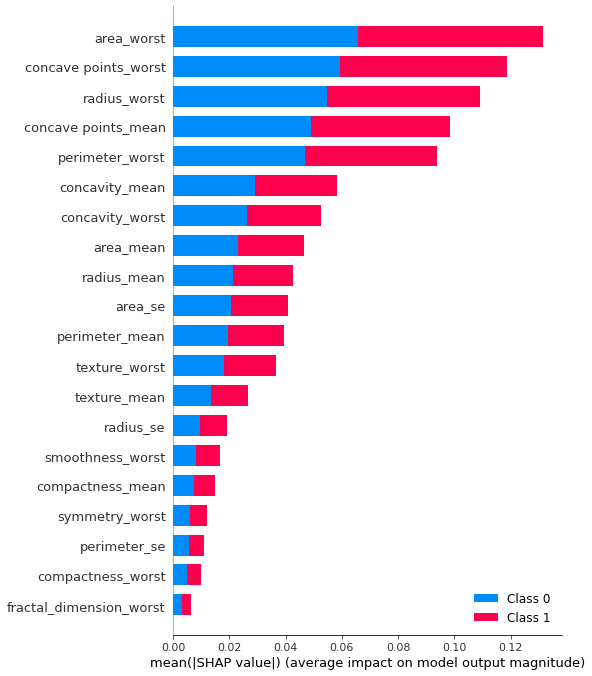

In [117]:
shap.summary_plot(shap_values, to_explain, plot_type="bar")

In [118]:
np.float = float

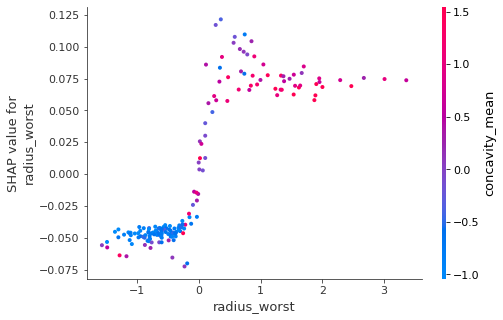

In [119]:
shap.dependence_plot('radius_worst', shap_values[1], to_explain)

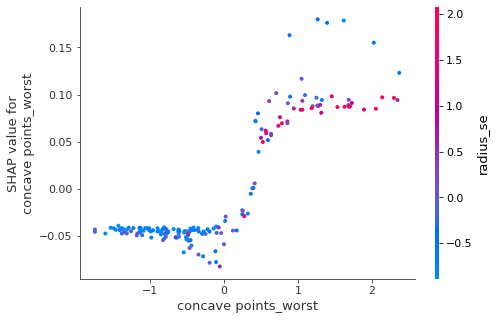

In [120]:
shap.dependence_plot('concave points_worst', shap_values[1], to_explain)

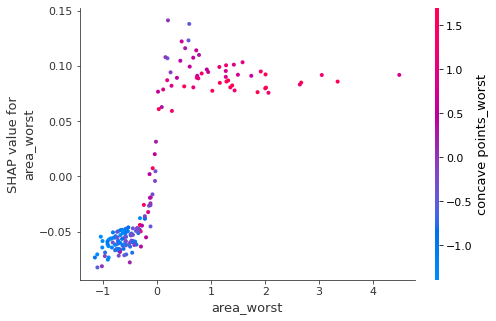

In [121]:
shap.dependence_plot('area_worst', shap_values[1], to_explain)